# HW2 | Rebecca Dragon and Daniel Paddock
(a) Generate training data (xi
,yi
) for i = 1...8 by xi ∼ Uniform([0,1]), and yi = f (xi
)+εi
, where
f (x) = 1 + 2x − 2x
**2 and εi ∼ N (0, σ2
) and σ = 0.1. Plot the training data and the function f .
Response:

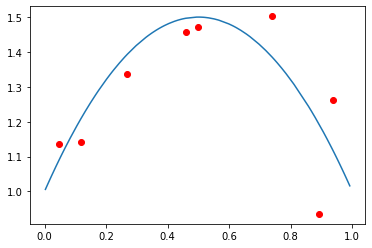

In [ ]:
import numpy as np

x = []
e = []
sigma = .1
for i in range(1, 9):
  x_rand = np.random.uniform(0, 1)
  x.append(x_rand)
  err_rand = np.random.normal(0, sigma)
  e.append(err_rand)

xarray = np.array(x)
earray = np.array(e)
xarray.sort()
farray_noise = 1 + 2*xarray - 2*xarray**2 + earray

s = np.random.uniform(0,1,100)
s.sort()

f_standard = 1 + 2*s - 2*s**2

import matplotlib.pyplot as plt

plt.plot(s, f_standard)
plt.scatter(xarray, farray_noise, color = 'red')

(b) In this problem, you will find the best fit degree d polynomial for the above data for each
d between 0 and 7. Find it with least squares linear regression by minimizing the training
mean squared error (MSE)


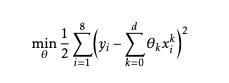


using the Normal Equations. Use numpy.linalg.solve to solve the Normal Equations
instead of computing a matrix inverse. On 8 separate plots, plot the data and the best fit
degree-d polynomial.

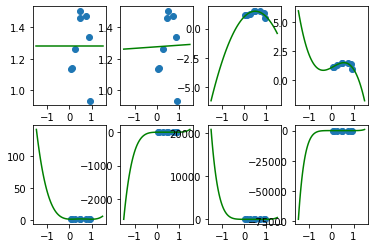

In [ ]:

n = 8
mse = np.zeros(8)
predicted_y = np.zeros(8)
theta = []

for d in range(0, n ):
  x_plot = np.linspace(-1.5,1.5,100)
  y = np.reshape(farray_noise, (8, 1))
  k = d + 1
  X = np.zeros((n, k))

  for i in range(n):
    for j in range(k):
      X[i][j] = xarray[i]**j

  aux_theta = np.linalg.solve(X.T.dot(X), X.T.dot(y))
  theta.append(aux_theta)

  # plt.figure(figsize=(5,2))
  plt.subplot(2,4,d+1)

  y_plot = aux_theta[0]*np.ones(100)
  for i in range(1,d+1):
    y_plot += aux_theta[i]*(x_plot**i)
  plt.plot(x_plot, y_plot, color='green')
  plt.scatter(x,y)

  error = 0
  for i in range(0,8):
    predicted = 0
    for k in range(0,d+1):
      predicted += aux_theta[k]*(xarray[i]**k)
    error += (y[i] - predicted)**2

  mse[d] = error*0.5

(c) Plot the MSE with respect to the training data (training MSE) as a function of d. Which
value of d provided the lowest training MSE?

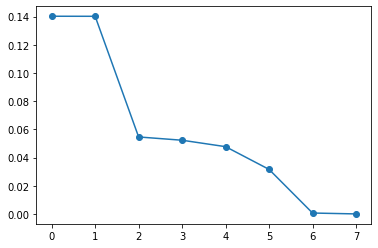

In [ ]:
plt.scatter([0,1,2,3,4,5,6,7], mse)
plt.plot([0,1,2,3,4,5,6,7], mse)


(d) Generate a test set of 1000 data points sampled according to the same process as in part (a).
Plot the MSE with respect to the test data (test MSE) as a function of d. Which value of d
provided the lowest test MSE?

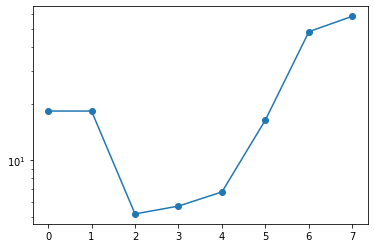

In [ ]:
x_large = []
e_large = []
sigma = .1
for r in range(1, 1001):
  x_rand = np.random.uniform()
  x_large.append(x_rand)

  err_rand = np.random.normal(0, sigma)
  e_large.append(err_rand)

xarray_large = np.array(x_large)
earray_large = np.array(e_large)
xarray_large.sort()

rand = np.random.RandomState()
epsilon = rand.normal(0,sigma,1000) 
farray_noise_large = np.zeros(1000)
farray_noise_large = 1+2*xarray_large-2*xarray_large**2+epsilon

for d in range(0, 8):
  error = 0
  for i in range(0,1000):
    predicted = 0
    for k in range(0,d+1):
      predicted += theta[d][k]*(xarray_large[i]**k)
    error += (farray_noise_large[i] - predicted)**2
  mse[d] = error*0.5

plt.scatter([0,1,2,3,4,5,6,7], mse)
plt.yscale("log")
plt.plot([0,1,2,3,4,5,6,7], mse)

##### The lowest value is where d = 2 ######

(a) Repeat 1b for d = 1 but solve (1) with gradient descent using TensorFlow or comparable
software. Plot the data and resulting best fit line, and plot the training MSE versus epoch
number. An epoch occurs when you iterate through the whole training dataset once. You
may find Sections 3.1–3.3 in Mattman helpful for setting up your code.

In [ ]:
# Generate x
# Generate e 
# Generate y
import numpy as np

x = []
e = []
sigma = .1
for i in range(1, 9):

  x_rand = np.random.uniform(0, 1)
  x.append(x_rand)

  err_rand = np.random.normal(0, sigma)
  e.append(err_rand)

xarray = np.array(x)
earray = np.array(e)

xarray.sort()

farray_noise = 1 + 2*xarray - 2*xarray**2 + earray



s = np.random.uniform(0,1,100)




s.sort()

f_standard = 1 + 2*s - 2*s**2


%tensorflow_version 1.x
import tensorflow as tf

train_X = xarray
train_Y = farray_noise

optimizer = tf.train.GradientDescentOptimizer(0.1)
x = tf.placeholder(tf.float32, shape=(None, ), name='x')
y = tf.placeholder(tf.float32, shape=(None, ), name='y')
w = tf.Variable(np.random.normal(), name='W')
b = tf.Variable(np.random.normal(), name='b')
loss = tf.reduce_mean(tf.square((w*x+b) - y))
op = optimizer.minimize(loss)

with tf.Session() as session:
  session.run(tf.global_variables_initializer())
  data = {x: xarray, y: farray_noise}
  
  mse = []
  for i in range(1000):
    session.run(op, data)
    error = loss.eval(data)
    mse.append(error)


  
  y_pred_batch = session.run(w*x+b, {x : xarray})




TensorFlow 1.x selected.


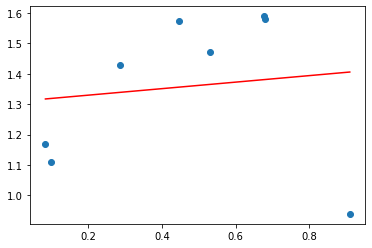

In [ ]:
## Print the generated line

init = tf.compat.v1.global_variables_initializer()



# print(w)

plt.scatter(xarray, farray_noise)
plt.plot(xarray, y_pred_batch, color='red')


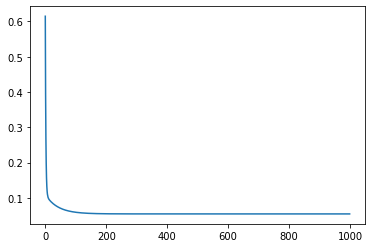

In [ ]:
## Print MSE Converging to 0 with epochs

plt.plot(range(1000), mse)